In [10]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (12,12)

In [11]:
# def crop(img, ax0_min, ax0_max, ax1_min, ax1_max):
#     ax0_size = ax0_max - ax0_min
#     ax1_size = ax1_max - ax1_min
#     ax0_start = int(max(0, ax0_min - ax0_size*2))
#     ax1_start = int(max(0, ax1_min - ax1_size*2))
#     cropped = img[ax0_start: ax0_start + ax0_size *
#                   5, ax1_start: ax1_start + ax1_size*5]

In [12]:
filename = '../csv_detection_info/20_1, sklerose.csv'
filename_clean = '../csv_detection_info_clean/20_1, sklerose.csv'
saved_cropped_image = '//nmbu.no/LargeFile/Project/CubiAI/preprocess/cropped/20/1, sklerose'

In [13]:
detection_df = pd.read_csv(filename)

In [14]:
detection_df

,base_path,filename,ax0_min,ax0_max,ax1_min,ax1_max,confidence,year,diagnosis,diagnosis_raw
0,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.95.20200210.91612.0.0.dcm,800,965,1434,1599,0.999980,20,1,"1, sklerose"
1,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.95.20201214.102216.0.0.dcm,523,644,411,532,0.999813,20,1,"1, sklerose"
2,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.95.20201214.102813.0.0.dcm,549,680,852,982,0.999977,20,1,"1, sklerose"
3,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.95.29487.20201208.140621.0.dcm,604,733,619,747,0.999915,20,1,"1, sklerose"
4,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.95.29669.20200603.123501.0.dcm,591,772,786,966,0.997486,20,1,"1, sklerose"
...,...,...,...,...,...,...,...,...,...,...
60,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.4173450526.51929.39755.48891.2099.4...,799,1026,1254,1481,0.981937,20,1,"1, sklerose"
61,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.589636246.10958.57408.38533.31707.5...,554,710,1318,1474,0.999998,20,1,"1, sklerose"
62,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.615395438.58224.50511.34249.22657.2...,945,1121,1134,1311,0.999998,20,1,"1, sklerose"
63,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,172.177.1126.1225.1148.1223.20201012171549.30.dcm,0,0,0,0,0.000000,20,1,"1, sklerose"


### [Optional] Sort by confidence (filter out bad prediction)

In [15]:
# detection_df = detection_df[detection_df.confidence > 0.5]

In [16]:
detection_df[detection_df.confidence < 0.5]

,base_path,filename,ax0_min,ax0_max,ax1_min,ax1_max,confidence,year,diagnosis,diagnosis_raw
63,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,172.177.1126.1225.1148.1223.20201012171549.30.dcm,0,0,0,0,0.0,20,1,"1, sklerose"
64,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,172.177.1126.1225.1148.1223.20201012171633.32.dcm,0,0,0,0,0.0,20,1,"1, sklerose"


Note that there is one case that is not good

### Look at the crop images

Are they reasonable, if not, mark the "weird", "wrong detected" image indice before saving it back to the clean folder

In [17]:
# plot every 9 of them

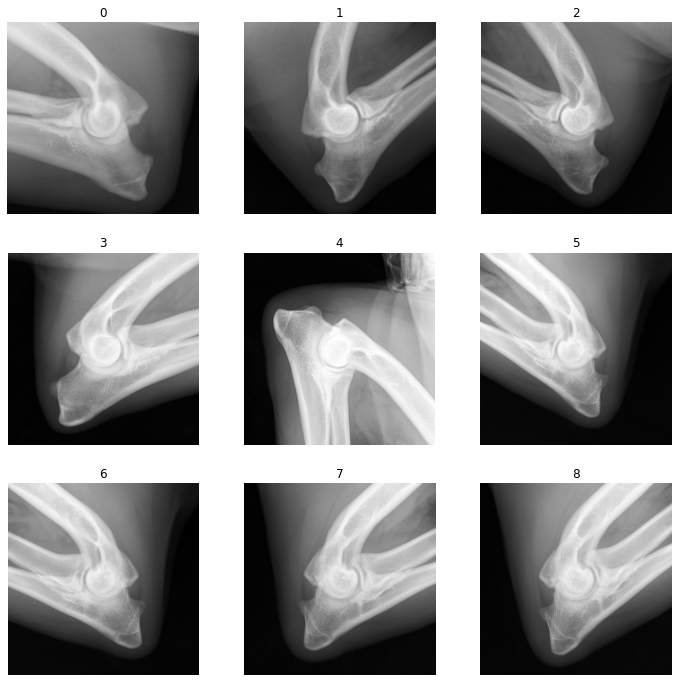

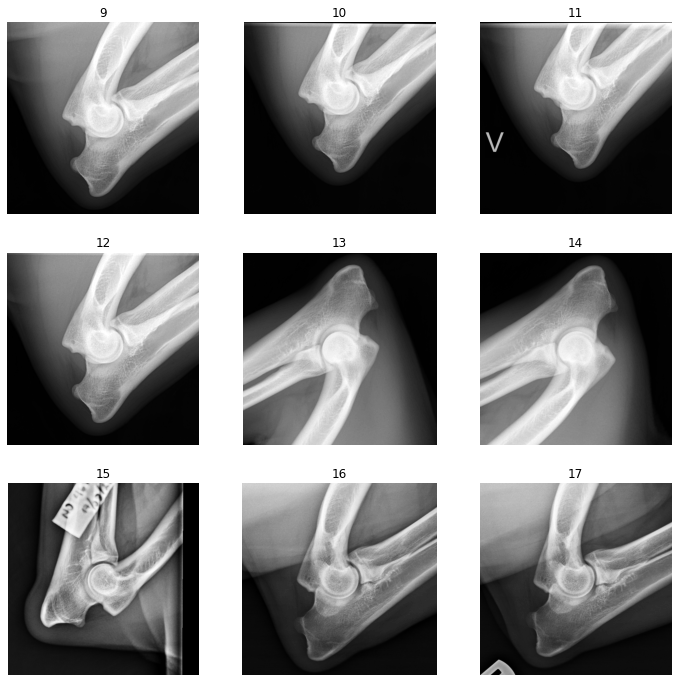

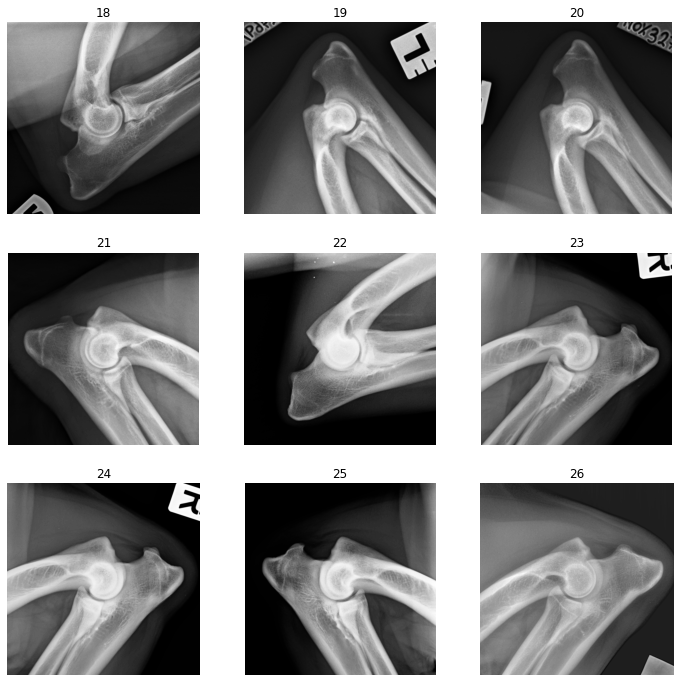

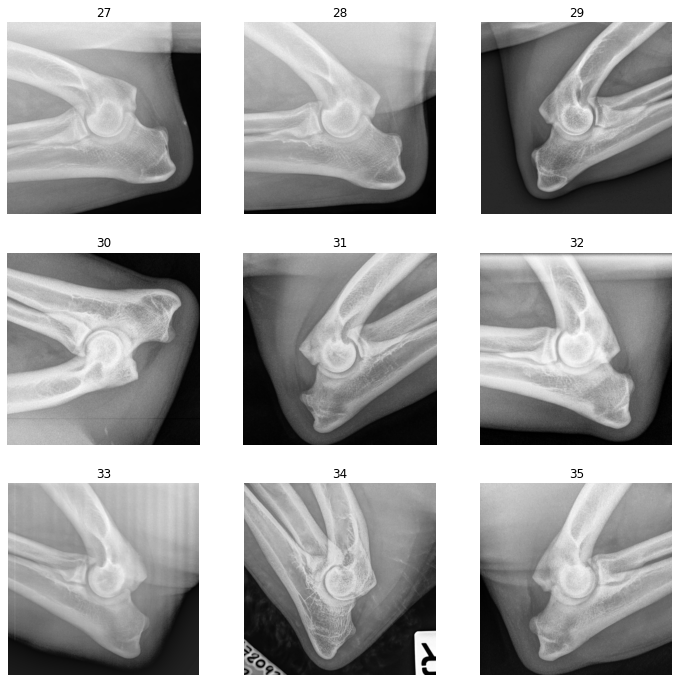

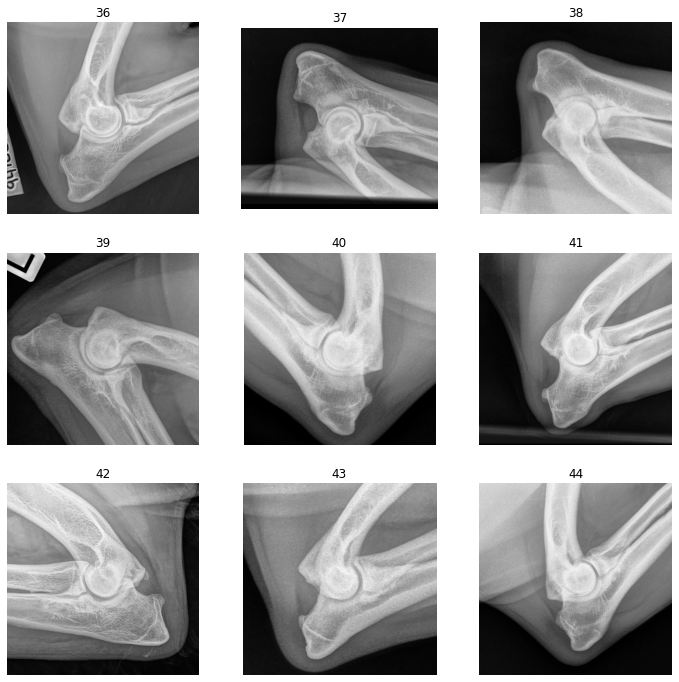

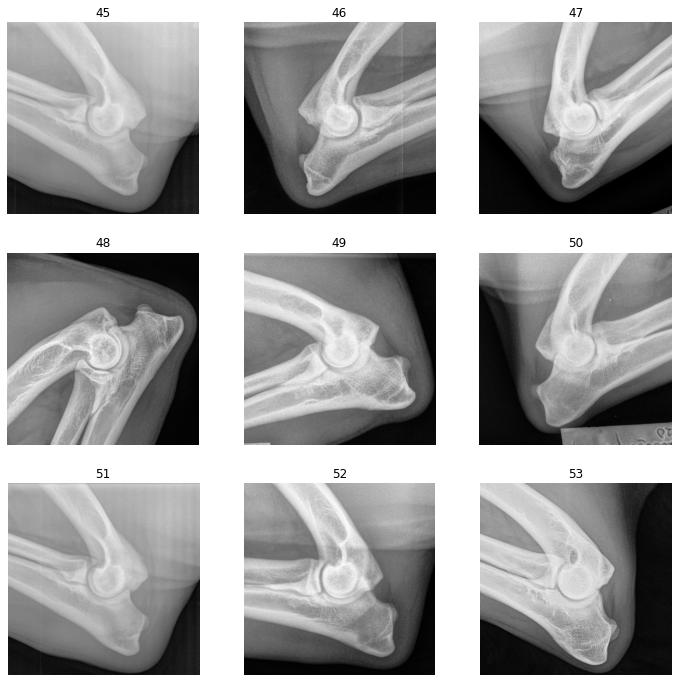

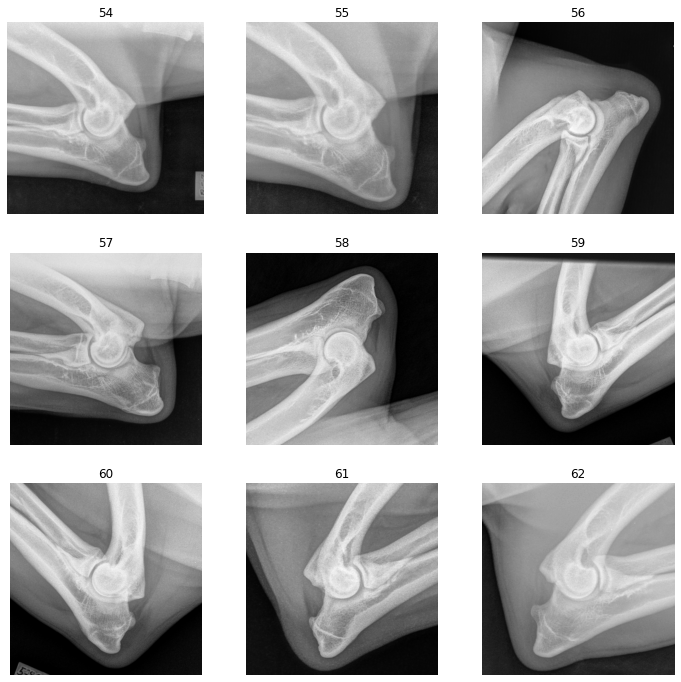

C:\NMBU\TEMP\ipykernel_7768\89006417.py:5: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  plt.imshow(img, 'gray')
C:\NMBU\TEMP\ipykernel_7768\89006417.py:5: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  plt.imshow(img, 'gray')


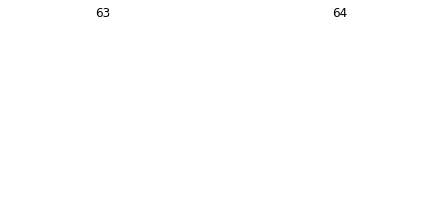

In [18]:
for id, item in detection_df.iterrows():
    fn = item['filename']
    img = np.load(saved_cropped_image + '/' + fn + '.npy')
    plt.subplot(3,3, (id%9) + 1)
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.title(str(id))
    
    if (id%9) == 8:
        plt.show()
        
plt.show()

## Remove bad detection items

In [19]:
remove_indice = [63,64]
detection_df[~detection_df.index.isin(remove_indice)]

,base_path,filename,ax0_min,ax0_max,ax1_min,ax1_max,confidence,year,diagnosis,diagnosis_raw
0,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.95.20200210.91612.0.0.dcm,800,965,1434,1599,0.999980,20,1,"1, sklerose"
1,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.95.20201214.102216.0.0.dcm,523,644,411,532,0.999813,20,1,"1, sklerose"
2,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.95.20201214.102813.0.0.dcm,549,680,852,982,0.999977,20,1,"1, sklerose"
3,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.95.29487.20201208.140621.0.dcm,604,733,619,747,0.999915,20,1,"1, sklerose"
4,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.95.29669.20200603.123501.0.dcm,591,772,786,966,0.997486,20,1,"1, sklerose"
...,...,...,...,...,...,...,...,...,...,...
58,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.2897478505.11008.22084.39735.6212.3...,1590,1791,1444,1645,0.999794,20,1,"1, sklerose"
59,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.3330552807.7003.51523.40975.59856.1...,697,934,1440,1678,0.993253,20,1,"1, sklerose"
60,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.4173450526.51929.39755.48891.2099.4...,799,1026,1254,1481,0.981937,20,1,"1, sklerose"
61,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.3.51.0.7.589636246.10958.57408.38533.31707.5...,554,710,1318,1474,0.999998,20,1,"1, sklerose"


In [20]:
new_detection_df = detection_df[~detection_df.index.isin(remove_indice)]

In [21]:
new_detection_df.to_csv(filename_clean, index=False)